# Project 1 - Understanding and Visualizing Data
# Data: [Hong Kong Horse Racing](https://www.kaggle.com/gdaley/hkracing?select=runs.csv)

## Load libraries

In [155]:
# Load libraries
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# this python magics will allow plot to be embedded into the notebook
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
plt.style.use('seaborn')
cmap = sns.diverging_palette(220, 10, as_cmap=True)


In [3]:
%load_ext rpy2.ipython

/Users/Camo/opt/anaconda3/envs/py37_r/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


## Read in cleaned data set, set variable types, and summarize data

In [4]:
# read in the data
url = "https://raw.githubusercontent.com/nedeinlein/Machine_Learning_I/main/runs_clean.csv"
runs_df = pd.read_csv(url, index_col=0)
print(runs_df.head(5))

   race_id  horse_no  horse_id  result  won  lengths_behind  horse_age  \
0        0         1      3917      10  0.0            8.00          3   
1        0         2      2157       8  0.0            5.75          3   
2        0         3       858       7  0.0            4.75          3   
3        0         4      1853       9  0.0            6.25          3   
4        0         5      2796       6  0.0            3.75          3   

  horse_country horse_type  horse_rating  ... behind_sec2  behind_sec3  time1  \
0           AUS    Gelding            60  ...        2.00         1.50  13.85   
1            NZ    Gelding            60  ...        9.00         5.00  14.57   
2            NZ    Gelding            60  ...        1.00         0.75  13.69   
3           SAF    Gelding            60  ...        5.00         3.50  14.09   
4            GB    Gelding            60  ...        8.75         4.25  14.77   

   time2  time3  finish_time  win_odds  place_odds  trainer_id  jock

In [5]:
# pandas info function to get data types, number of non-null entries
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79445 entries, 0 to 79446
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79445 non-null  int64  
 1   horse_no         79445 non-null  int64  
 2   horse_id         79445 non-null  int64  
 3   result           79445 non-null  int64  
 4   won              79445 non-null  float64
 5   lengths_behind   79445 non-null  float64
 6   horse_age        79445 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79445 non-null  int64  
 10  horse_gear       79445 non-null  object 
 11  declared_weight  79445 non-null  float64
 12  actual_weight    79445 non-null  int64  
 13  draw             79445 non-null  int64  
 14  position_sec1    79445 non-null  int64  
 15  position_sec2    79445 non-null  int64  
 16  position_sec3    79445 non-null  int64  
 17  behind_sec1 

View max and min number of races run by each horse

In [6]:
#Meaningless variable because it is an arbitrary number assigned to horse
del runs_df['horse_no']

runs_df['won']= runs_df['won'].astype(np.int64)


In [7]:
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79445 entries, 0 to 79446
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79445 non-null  int64  
 1   horse_id         79445 non-null  int64  
 2   result           79445 non-null  int64  
 3   won              79445 non-null  int64  
 4   lengths_behind   79445 non-null  float64
 5   horse_age        79445 non-null  int64  
 6   horse_country    79445 non-null  object 
 7   horse_type       79445 non-null  object 
 8   horse_rating     79445 non-null  int64  
 9   horse_gear       79445 non-null  object 
 10  declared_weight  79445 non-null  float64
 11  actual_weight    79445 non-null  int64  
 12  draw             79445 non-null  int64  
 13  position_sec1    79445 non-null  int64  
 14  position_sec2    79445 non-null  int64  
 15  position_sec3    79445 non-null  int64  
 16  behind_sec1      79445 non-null  float64
 17  behind_sec2 

In [8]:
runs_df.describe()

,race_id,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,draw,...,behind_sec2,behind_sec3,time1,time2,time3,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,...,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000
mean,3173.431670,2204.399434,6.838568,0.080055,6.108910,3.339354,61.034930,1104.953541,122.729738,6.876015,...,4.083942,4.509426,21.135480,22.929003,23.864065,85.323424,28.813174,7.423203,79.792271,85.830852
std,1833.057187,1275.063508,3.730510,0.271381,33.636628,0.876773,11.748934,62.348381,6.305554,3.747535,...,2.691127,16.541736,6.930537,3.599769,3.571206,18.512803,30.097708,8.613620,45.119204,54.337978
min,0.000000,0.000000,1.000000,0.000000,-0.500000,2.000000,10.000000,693.000000,103.000000,1.000000,...,0.150000,0.000000,12.390000,19.990000,21.000000,55.160000,1.000000,1.000000,0.000000,0.000000
25%,1586.000000,1085.000000,4.000000,0.000000,1.750000,3.000000,60.000000,1062.000000,118.000000,4.000000,...,1.750000,1.750000,14.120000,22.290000,23.230000,70.590000,7.700000,2.400000,47.000000,39.000000
50%,3175.000000,2209.000000,7.000000,0.000000,4.000000,3.000000,60.000000,1102.000000,123.000000,7.000000,...,3.750000,3.750000,24.180000,22.870000,23.760000,83.350000,15.000000,4.400000,75.000000,76.000000
75%,4765.000000,3308.000000,10.000000,0.000000,6.750000,3.000000,60.000000,1146.000000,128.000000,10.000000,...,5.750000,5.750000,25.360000,23.520000,24.410000,100.780000,38.000000,8.200000,118.000000,138.000000
max,6348.000000,4404.000000,14.000000,1.000000,999.000000,10.000000,138.000000,1369.000000,133.000000,15.000000,...,60.250000,999.000000,999.000000,999.000000,999.000000,163.580000,99.000000,101.000000,175.000000,185.000000


## Look deeper at races per horse/country and place odds

In [9]:
hg=runs_df.groupby(by=['horse_id']).count()
hg.sort_values(by=['race_id'],ascending=False)['race_id']

horse_id
3887    92
493     88
2382    83
779     77
70      77
        ..
2606     1
2607     1
2614     1
2648     1
457      1
Name: race_id, Length: 4404, dtype: int64

Histogram of count of races for each horse

(array([581., 315., 273., 288., 262., 127., 239., 248., 207., 201., 165.,
         90., 150., 126., 136., 110.,  70., 116.,  98., 106.,  76.,  58.,
         37.,  53.,  37.,  46.,  30.,  12.,  20.,  23.,  18.,  16.,  20.,
          4.,   9.,   6.,   9.,   3.,   4.,   4.,   2.,   6.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   1.]),
 array([ 1.  ,  2.82,  4.64,  6.46,  8.28, 10.1 , 11.92, 13.74, 15.56,
        17.38, 19.2 , 21.02, 22.84, 24.66, 26.48, 28.3 , 30.12, 31.94,
        33.76, 35.58, 37.4 , 39.22, 41.04, 42.86, 44.68, 46.5 , 48.32,
        50.14, 51.96, 53.78, 55.6 , 57.42, 59.24, 61.06, 62.88, 64.7 ,
        66.52, 68.34, 70.16, 71.98, 73.8 , 75.62, 77.44, 79.26, 81.08,
        82.9 , 84.72, 86.54, 88.36, 90.18, 92.  ]),
 <BarContainer object of 50 artists>)

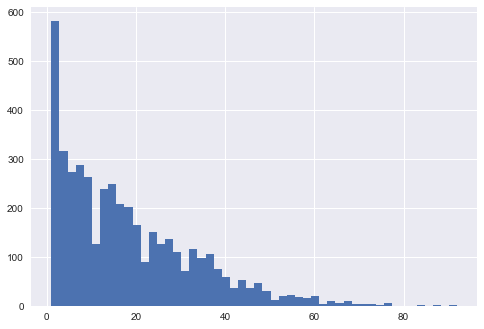

In [10]:
plt.hist(hg['race_id'],bins=50)

In [11]:
#Count of unique horses per country in the data
hc=runs_df.groupby(by=['horse_country']).count()
hc.sort_values(by=['horse_id'],ascending=False)['horse_id']

horse_country
AUS    29906
NZ     27497
IRE    10473
GB      6329
USA     2499
FR      1257
SAF      685
GER      357
ARG      127
JPN       93
CAN       91
ITY       66
GR        33
BRZ       18
ZIM       12
SPA        2
Name: horse_id, dtype: int64

<AxesSubplot:ylabel='horse_country'>

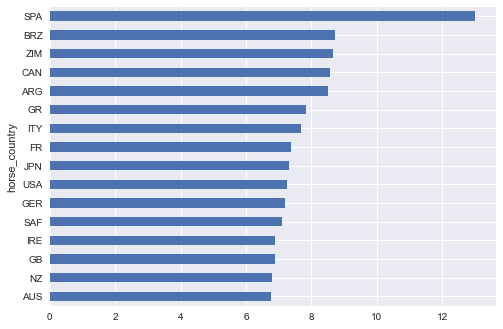

In [53]:
#Percentage win rate of horses by country
df_grouped = runs_df.groupby(by='horse_country')
win_rate_country=(df_grouped.result.sum() / df_grouped.result.count())
win_rate_country=win_rate_country.sort_values()
win_rate_country.plot(kind='barh',sort_columns=False,)

(array([9., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([2.000000e+00, 6.000800e+02, 1.198160e+03, 1.796240e+03,
        2.394320e+03, 2.992400e+03, 3.590480e+03, 4.188560e+03,
        4.786640e+03, 5.384720e+03, 5.982800e+03, 6.580880e+03,
        7.178960e+03, 7.777040e+03, 8.375120e+03, 8.973200e+03,
        9.571280e+03, 1.016936e+04, 1.076744e+04, 1.136552e+04,
        1.196360e+04, 1.256168e+04, 1.315976e+04, 1.375784e+04,
        1.435592e+04, 1.495400e+04, 1.555208e+04, 1.615016e+04,
        1.674824e+04, 1.734632e+04, 1.794440e+04, 1.854248e+04,
        1.914056e+04, 1.973864e+04, 2.033672e+04, 2.093480e+04,
        2.153288e+04, 2.213096e+04, 2.272904e+04, 2.332712e+04,
        2.392520e+04, 2.452328e+04, 2.512136e+04, 2.571944e+04,
        2.631752e+04, 2.691560e+04, 2.751368e+04, 2.811176e+04,
      

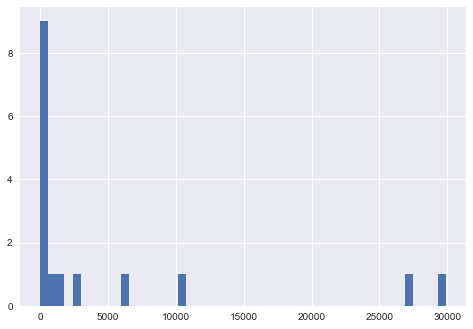

In [12]:
plt.hist(hc['horse_id'],bins=50)

Alternative one liner to create histogram

<AxesSubplot:>

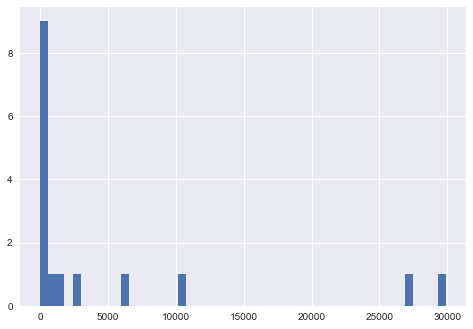

In [13]:
runs_df.groupby(by=['horse_country']).count()['horse_id'].hist(bins=50)

Boxplot of place odds by country and by type (since this was common missing value)

<AxesSubplot:title={'center':'place_odds'}, xlabel='horse_country'>

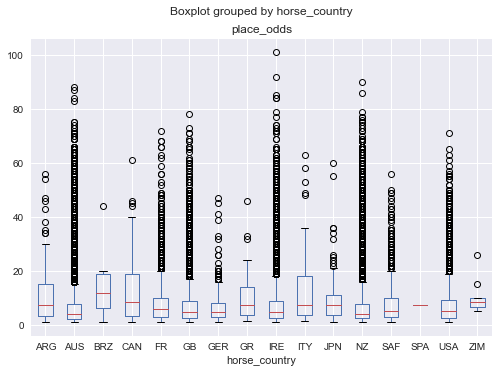

In [14]:
runs_df.boxplot(column='place_odds',by='horse_country')
#plt.suptitle('')

<AxesSubplot:title={'center':'place_odds'}, xlabel='horse_type'>

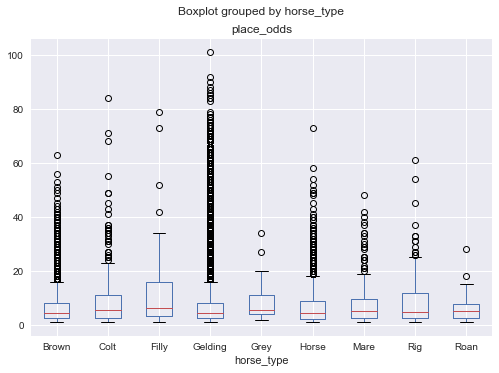

In [15]:
runs_df.boxplot(column='place_odds',by='horse_type')
#plt.suptitle('')

## Look at attribute correlation and significance

<AxesSubplot:>

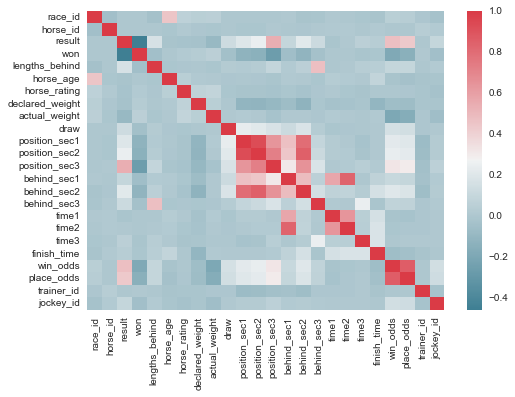

In [18]:
correlations = runs_df.corr()
sns.heatmap(correlations,cmap=cmap)

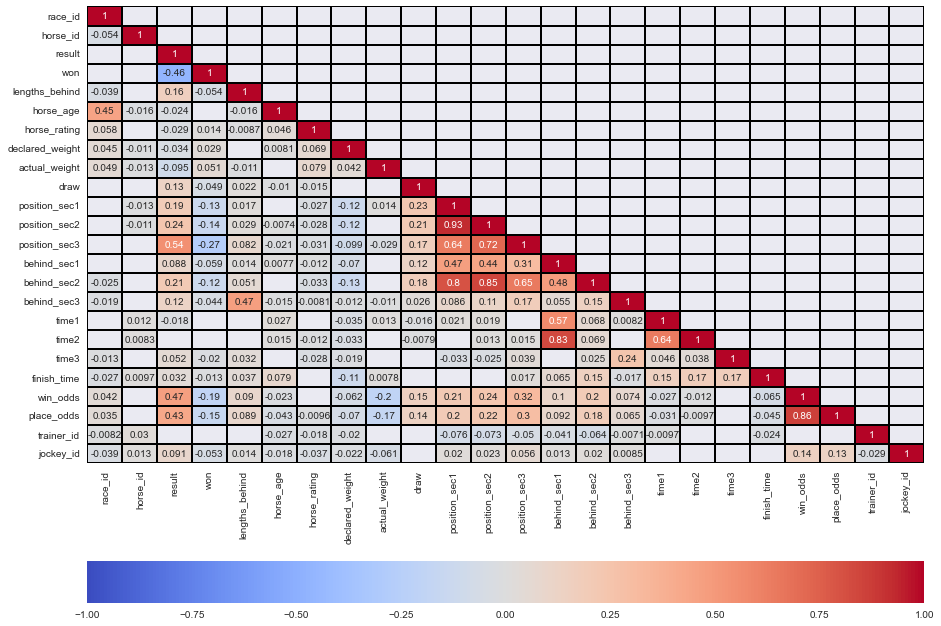

In [159]:
#from https://stackoverflow.com/questions/57226054/seaborn-correlation-matrix-with-p-values-with-python
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(15, 12))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})
    
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

# Plotting with significance filter
run_num=runs_df.select_dtypes(include=[np.number]) 
corr = run_num.corr()                            # get correlation
p_values = corr_sig(run_num)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)  

## Win/ Place Odds vs. Result

<AxesSubplot:xlabel='result', ylabel='Count'>

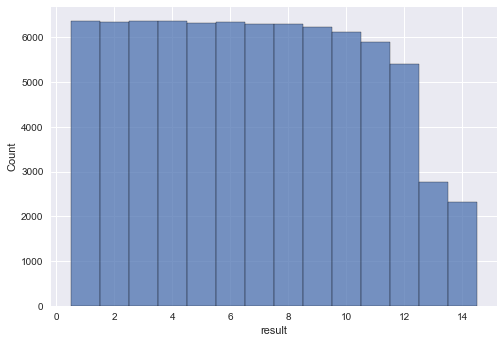

In [136]:
sns.histplot(x='result', data=runs_df,bins=14,binwidth=1,binrange=[0.5,14.5])

<AxesSubplot:xlabel='result', ylabel='win_odds'>

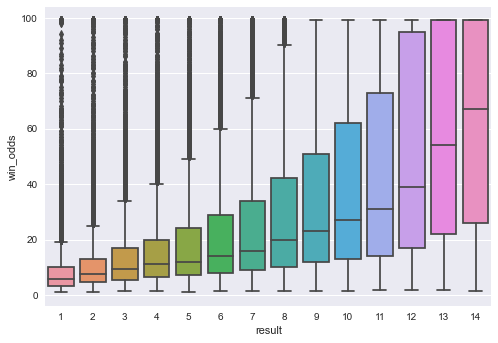

In [99]:
sns.boxplot(x='result', y='win_odds', data=runs_df)

<AxesSubplot:xlabel='result', ylabel='place_odds'>

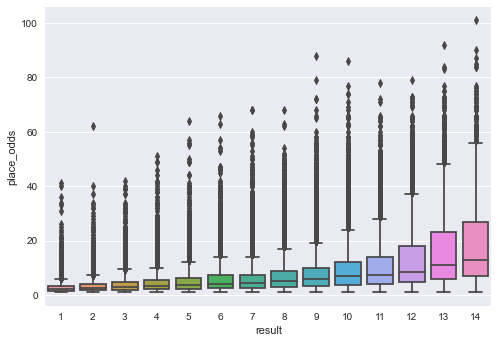

In [79]:
sns.boxplot(x='result', y='place_odds', data=runs_df)

<AxesSubplot:xlabel='result', ylabel='place_odds'>

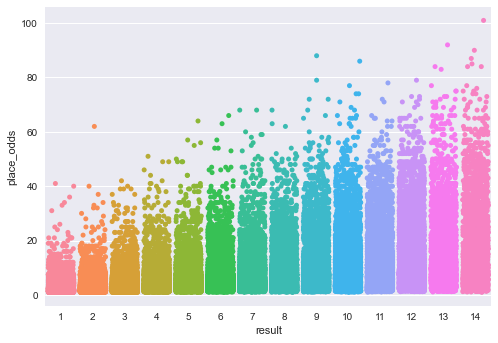

In [78]:
sns.stripplot(x='result', y='place_odds', data=runs_df,jitter=.4)

## Looking at Horse Age

<AxesSubplot:xlabel='horse_age', ylabel='Count'>

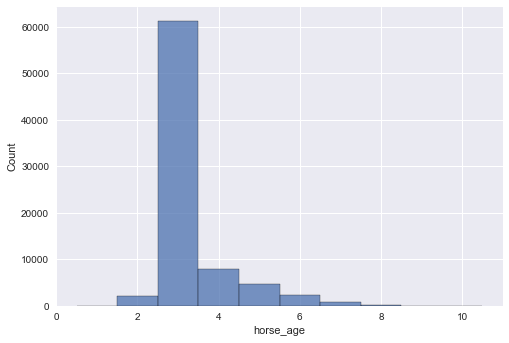

In [117]:
sns.histplot(x='horse_age', data=runs_df,bins=10,binwidth=1,binrange=[0.5,10.5])

<AxesSubplot:xlabel='horse_age', ylabel='win_odds'>

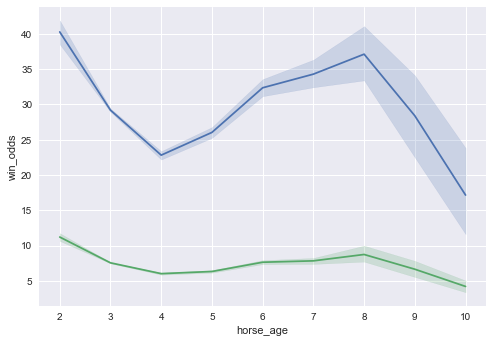

In [126]:
sns.lineplot(x='horse_age', y='win_odds', data=runs_df)
sns.lineplot(x='horse_age', y='place_odds', data=runs_df)

<AxesSubplot:xlabel='horse_age', ylabel='result'>

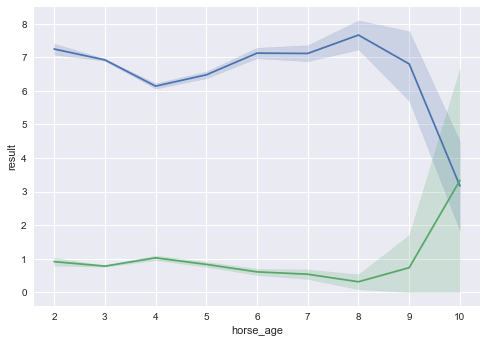

In [133]:
sns.lineplot(x='horse_age', y='result', data=runs_df)
sns.lineplot(x='horse_age', y=runs_df['won']*10, data=runs_df)

## Looking at actual weight

<AxesSubplot:xlabel='actual_weight', ylabel='Count'>

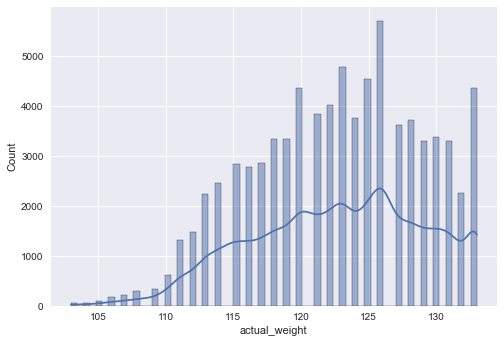

In [114]:
sns.histplot(x='actual_weight', data=runs_df,kde=True)

<AxesSubplot:xlabel='actual_weight', ylabel='win_odds'>

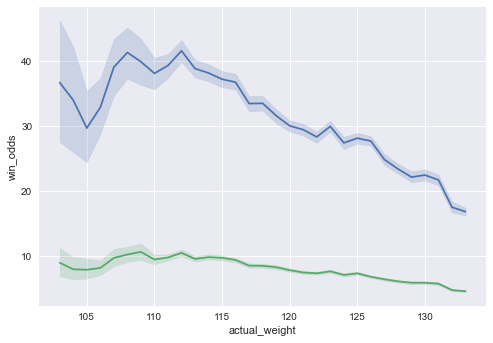

In [125]:
sns.lineplot(x='actual_weight', y='win_odds', data=runs_df)
sns.lineplot(x='actual_weight', y='place_odds', data=runs_df)

<AxesSubplot:xlabel='actual_weight', ylabel='result'>

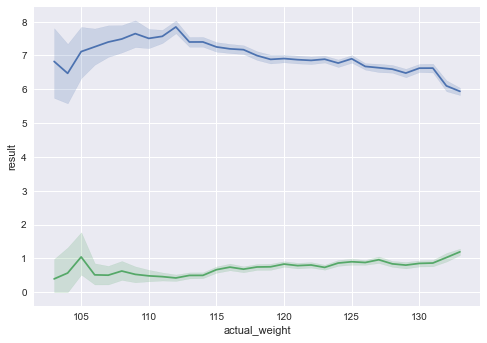

In [134]:
sns.lineplot(x='actual_weight', y='result', data=runs_df)
sns.lineplot(x='actual_weight', y=runs_df['won']*10, data=runs_df,)

## Looking at Declared Weight

<AxesSubplot:xlabel='declared_weight', ylabel='Count'>

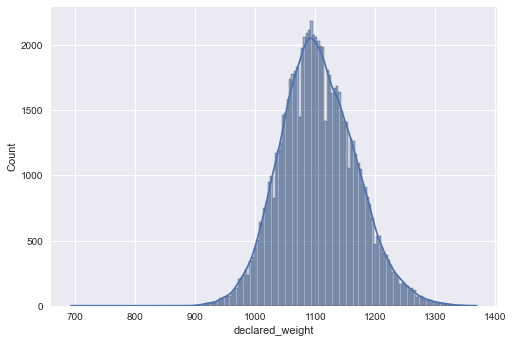

In [160]:
sns.histplot(x='declared_weight', data=runs_df,kde=True)

<AxesSubplot:xlabel='declared_weight', ylabel='win_odds'>

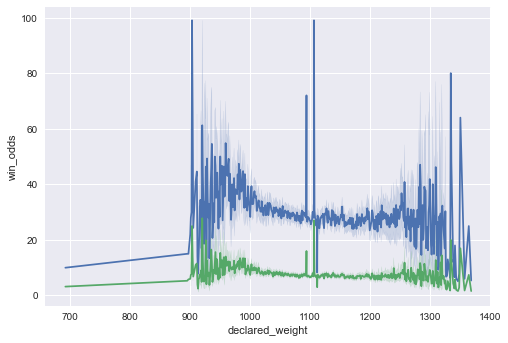

In [163]:
sns.lineplot(x='declared_weight', y='win_odds', data=runs_df,)
sns.lineplot(x='declared_weight', y='place_odds', data=runs_df)

(900.0, 1350.0)

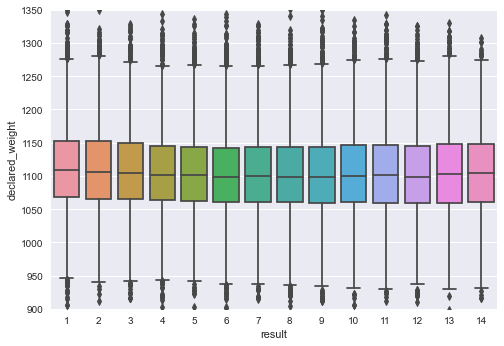

In [169]:
ax=sns.boxplot(x='result', y='declared_weight', data=runs_df)
ax.set_ylim(900,1350)

## Looking at Horse Rating

<AxesSubplot:xlabel='horse_rating', ylabel='Count'>

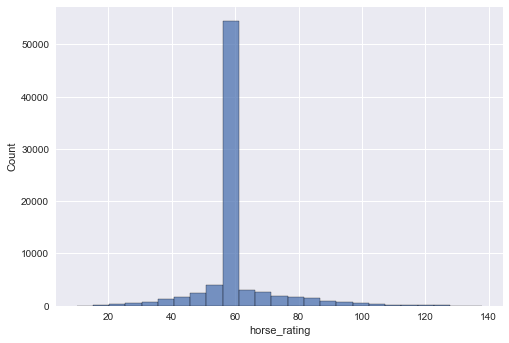

In [142]:
sns.histplot(x='horse_rating', data=runs_df,bins=25)

<AxesSubplot:xlabel='horse_rating', ylabel='win_odds'>

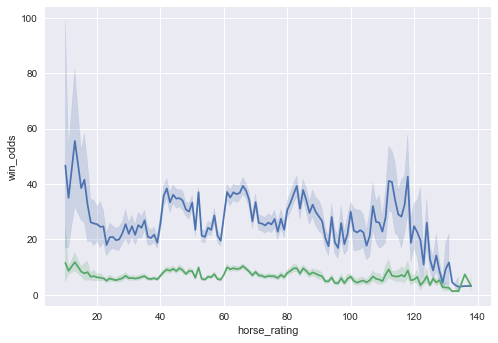

In [143]:
sns.lineplot(x='horse_rating', y='win_odds', data=runs_df)
sns.lineplot(x='horse_rating', y='place_odds', data=runs_df)

<AxesSubplot:xlabel='horse_rating', ylabel='result'>

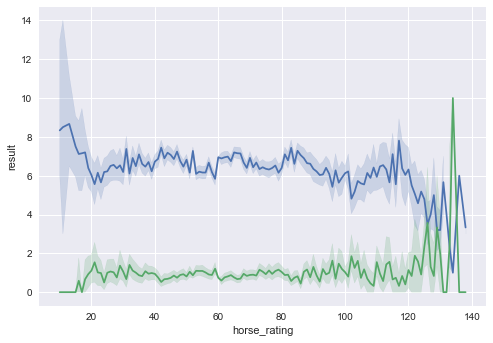

In [144]:
sns.lineplot(x='horse_rating', y='result', data=runs_df)
sns.lineplot(x='horse_rating', y=runs_df['won']*10, data=runs_df,)

## Looking at Horse Gear

<AxesSubplot:xlabel='horse_gear', ylabel='count'>

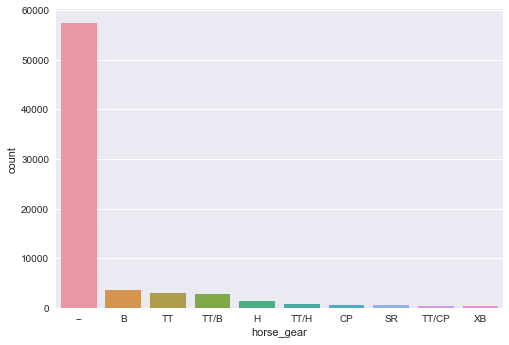

In [147]:
sns.countplot(x=runs_df['horse_gear'], order=pd.value_counts(runs_df['horse_gear']).iloc[:10].index)

<AxesSubplot:xlabel='horse_gear', ylabel='result'>

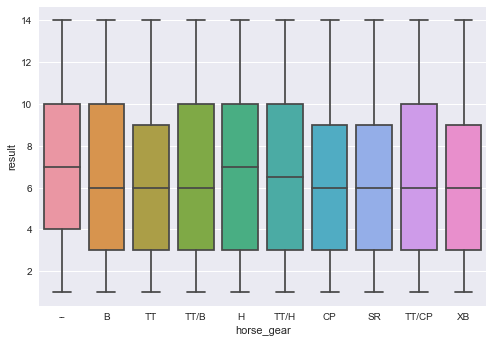

In [166]:
sns.boxplot(x=runs_df['horse_gear'],y='result',data=runs_df,
            order=pd.value_counts(runs_df['horse_gear']).iloc[:10].index)

## Looking by Horse Type

<AxesSubplot:xlabel='horse_type', ylabel='count'>

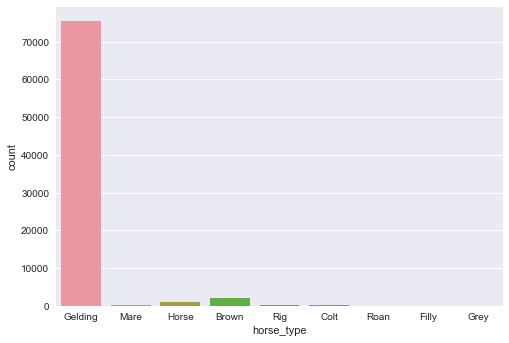

In [174]:
sns.countplot(x=runs_df['horse_type'])

<AxesSubplot:xlabel='horse_type', ylabel='result'>

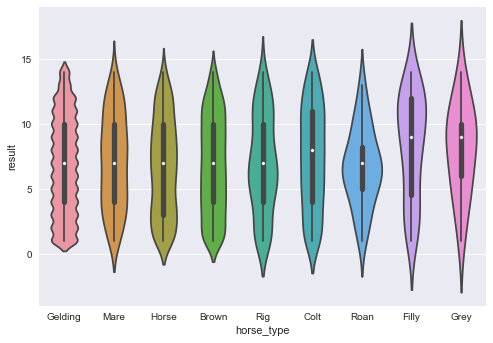

In [177]:
sns.violinplot(x=runs_df['horse_type'],y='result',data=runs_df)

## Looking at Draw

<AxesSubplot:xlabel='draw', ylabel='count'>

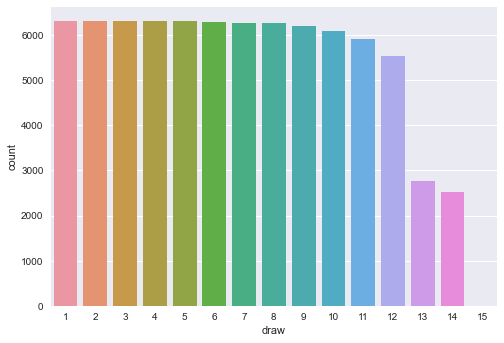

In [178]:
sns.countplot(x=runs_df['draw'])

<AxesSubplot:xlabel='draw', ylabel='win_odds'>

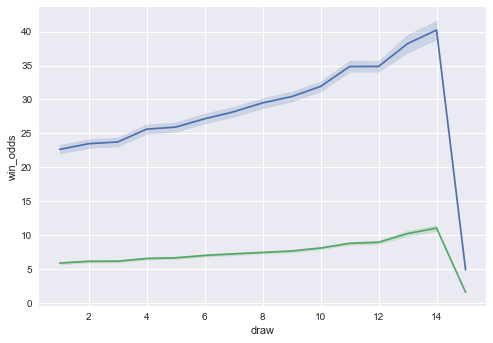

In [186]:
sns.lineplot(x='draw', y='win_odds', data=runs_df,)
sns.lineplot(x='draw', y='place_odds', data=runs_df)

<AxesSubplot:xlabel='draw', ylabel='win_odds'>

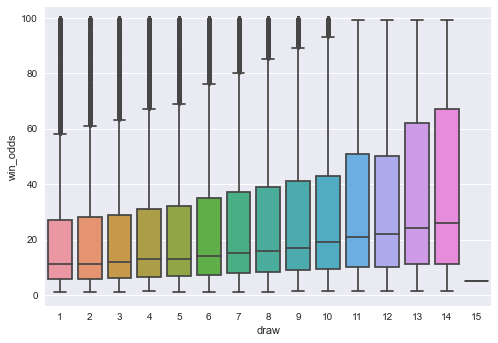

In [216]:
sns.boxplot(x='draw', y='win_odds', data=runs_df)

<AxesSubplot:xlabel='result', ylabel='draw'>

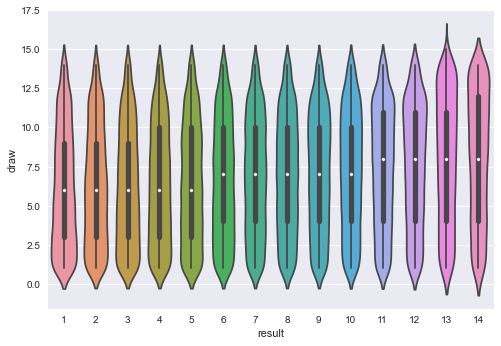

In [212]:
sns.violinplot(x='result', y='draw', data=runs_df,)

<AxesSubplot:xlabel='draw', ylabel='won'>

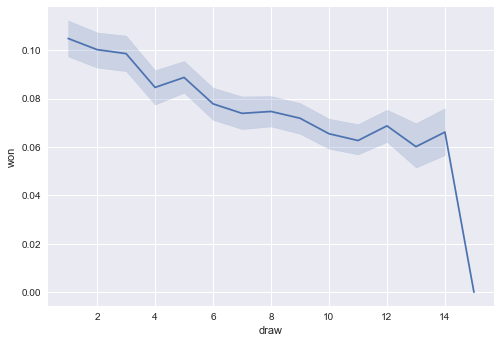

In [214]:
sns.lineplot(x='draw', y='won', data=runs_df)

## Looking at Position

<AxesSubplot:xlabel='result', ylabel='position_sec1'>

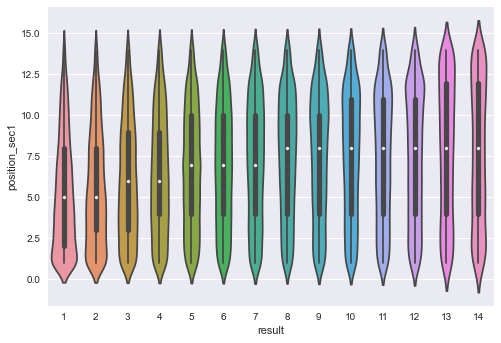

In [207]:
sns.violinplot(x='result', y='position_sec1', data=runs_df)

<AxesSubplot:xlabel='result', ylabel='position_sec2'>

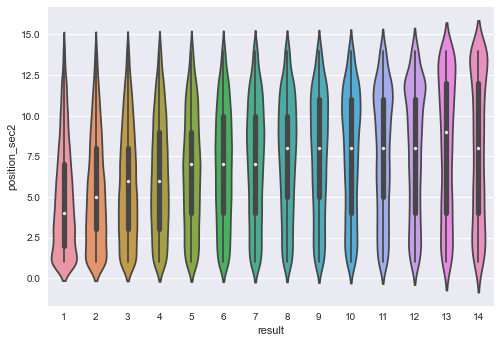

In [208]:
sns.violinplot(x='result', y='position_sec2', data=runs_df)

<AxesSubplot:xlabel='result', ylabel='position_sec3'>

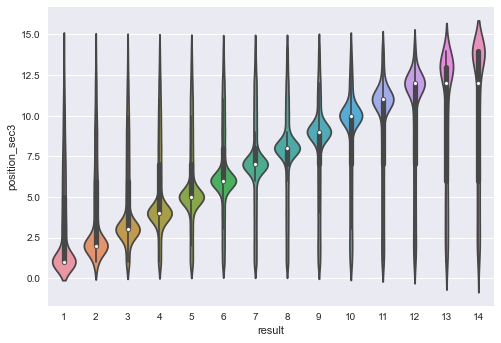

In [206]:
sns.violinplot(x='result', y='position_sec3', data=runs_df)

## Looking at Lengths Behind

(0.0, 15.0)

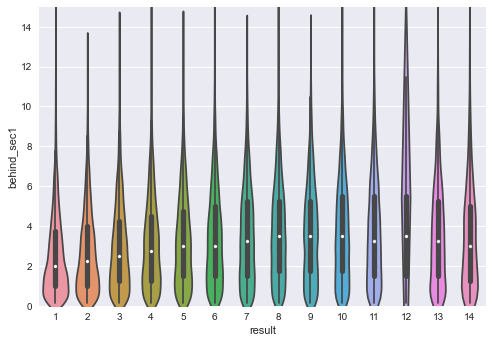

In [203]:
ax=sns.violinplot(x='result', y='behind_sec1', data=runs_df)
ax.set_ylim(0,15)

(0.0, 15.0)

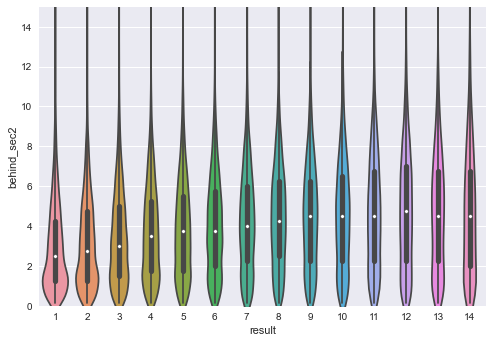

In [204]:
ax=sns.violinplot(x='result', y='behind_sec2', data=runs_df)
ax.set_ylim(0,15)

(0.0, 15.0)

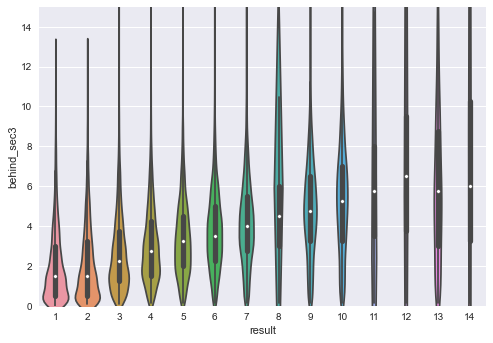

In [205]:
ax=sns.violinplot(x='result', y='behind_sec3', data=runs_df)
ax.set_ylim(0,15)

(0.0, 20.0)

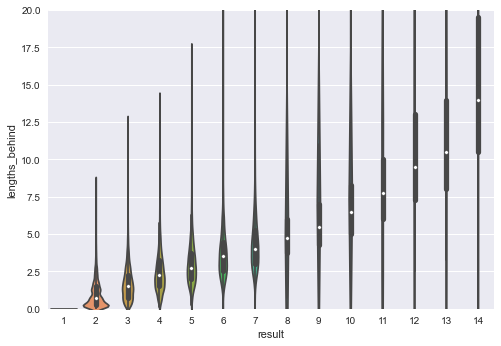

In [249]:
ax=sns.violinplot(x='result', y='lengths_behind', data=runs_df)
ax.set_ylim(0,20)

## Looking at Time

(0.0, 50.0)

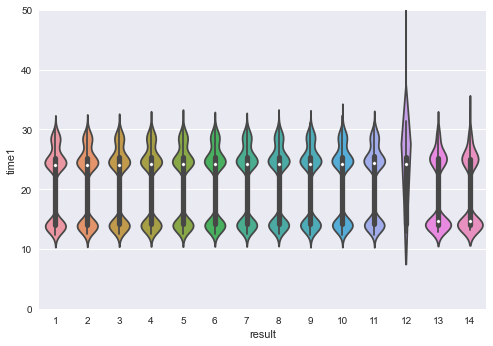

In [218]:
ax=sns.violinplot(x='result', y='time1', data=runs_df)
ax.set_ylim(0,50)

(0.0, 50.0)

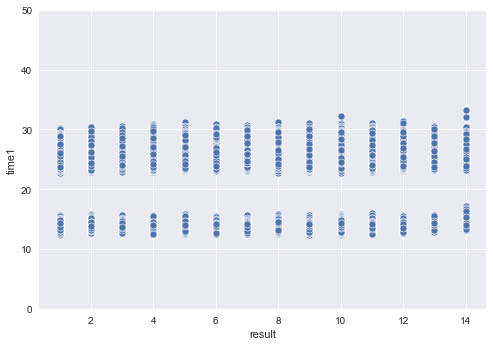

In [224]:
#This appears to be an error or the first section is an inconsistent distance
ax=sns.scatterplot(x='result', y='time1', data=runs_df)
ax.set_ylim(0,50)

(0.0, 50.0)

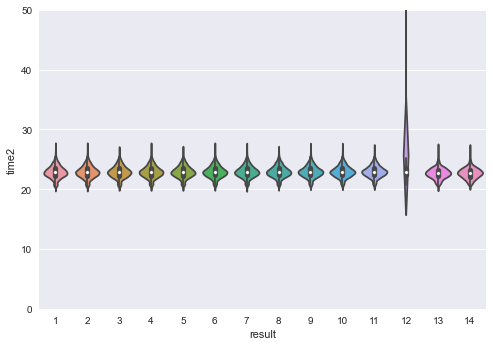

In [220]:
ax=sns.violinplot(x='result', y='time2', data=runs_df)
ax.set_ylim(0,50)

(0.0, 50.0)

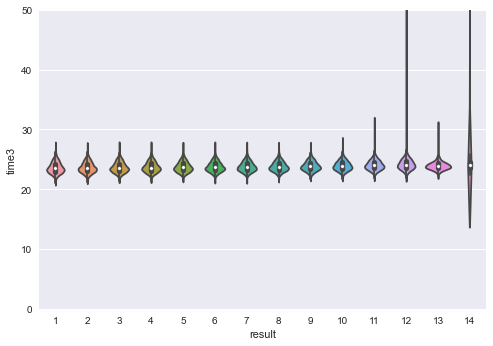

In [226]:
ax=sns.violinplot(x='result', y='time3', data=runs_df)
ax.set_ylim(0,50)

(45.0, 125.0)

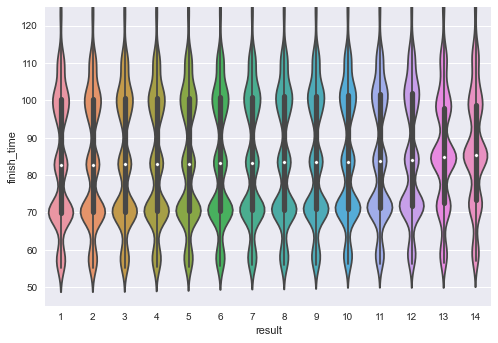

In [234]:
ax=sns.violinplot(x='result', y='finish_time', data=runs_df)
ax.set_ylim(45,125)

<AxesSubplot:xlabel='trainer_id', ylabel='count'>

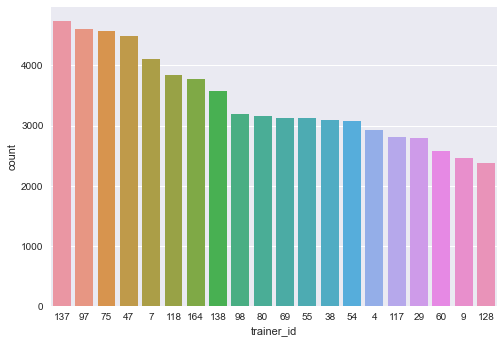

In [240]:
#This is tricky due to the same horse repeating and inflating the trainer
sns.countplot(x=runs_df['trainer_id'], order=pd.value_counts(runs_df['trainer_id']).iloc[:20].index)

<AxesSubplot:xlabel='trainer_id', ylabel='result'>

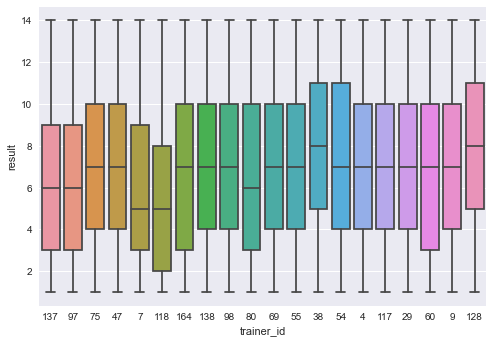

In [242]:
sns.boxplot(x=runs_df['trainer_id'],y='result',data=runs_df,
            order=pd.value_counts(runs_df['trainer_id']).iloc[:20].index)

<AxesSubplot:xlabel='jockey_id', ylabel='count'>

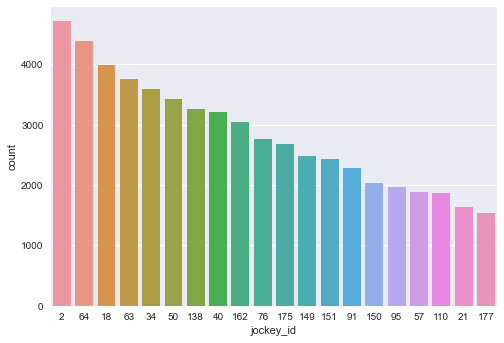

In [244]:
#This is tricky due to the same horse repeating and inflating the trainer
sns.countplot(x=runs_df['jockey_id'], order=pd.value_counts(runs_df['jockey_id']).iloc[:20].index)

<AxesSubplot:xlabel='jockey_id', ylabel='result'>

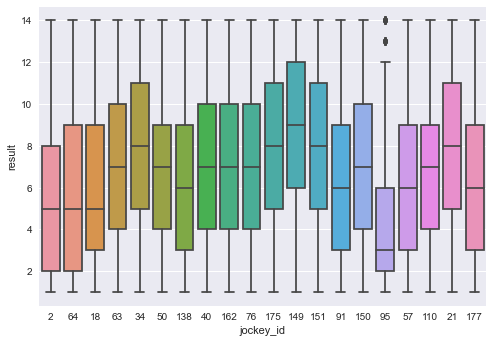

In [246]:
sns.boxplot(x=runs_df['jockey_id'],y='result',data=runs_df,
            order=pd.value_counts(runs_df['jockey_id']).iloc[:20].index)

In [88]:
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79445 entries, 0 to 79446
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79445 non-null  int64  
 1   horse_id         79445 non-null  int64  
 2   result           79445 non-null  int64  
 3   won              79445 non-null  int64  
 4   lengths_behind   79445 non-null  float64
 5   horse_age        79445 non-null  int64  
 6   horse_country    79445 non-null  object 
 7   horse_type       79445 non-null  object 
 8   horse_rating     79445 non-null  int64  
 9   horse_gear       79445 non-null  object 
 10  declared_weight  79445 non-null  float64
 11  actual_weight    79445 non-null  int64  
 12  draw             79445 non-null  int64  
 13  position_sec1    79445 non-null  int64  
 14  position_sec2    79445 non-null  int64  
 15  position_sec3    79445 non-null  int64  
 16  behind_sec1      79445 non-null  float64
 17  behind_sec2 

In [ ]:
#sns.clustermap(runs_df.iloc[:, [1,2,5,8,10,11,12,23,24,25,26]])

# Attempting to merge in races

We can try LDA with PCA variables, but the goal of this assignment is more understanding and visualization and less prediction

New var ideas: 
- We find the expected time to win at each venue over the data time period (see if it changes with time)
- Then we find the expected velocity (dist/time) needed to win a race (by venue, by time period, by poll position,based on prize money) 
- We find the average velocity of each horse based on distance (over time period, by poll position)
- We then take the expected velocity to win against the expected velocity of the horse (proportion or difference)    
    -*This difference can be combined with win/place odds to control for other horses in the race*
- Need to add in vars from races (Distance, winning time, etc)